In [ ]:
import numpy as np
import pandas as pd
import requests
from pykrx import stock
import time
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [2]:
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [4]:
stock_list.head()

,종목코드,종목명
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


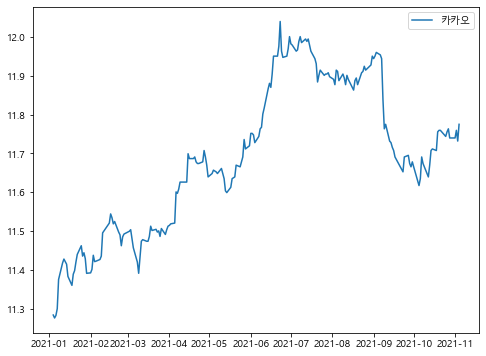

In [5]:
name = '카카오'
fromdate = str(20210101)
todate = str(20211104)

ticker1 = stock_list.loc[stock_list['종목명']== name, '종목코드']
df1 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker1)

data = np.log(df1['종가'])

plt.figure(figsize=(8, 6))
plt.plot(data)
plt.legend([f'{name}'])
plt.show()

In [8]:
seri = df1['종가']

In [36]:
df = pd.DataFrame(seri, columns=['종가','일계도','이계도','일계도부호','이계도부호'])
df.head()

,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,NaN,NaN,NaN,NaN
2021-01-05,78881,NaN,NaN,NaN,NaN
2021-01-06,79383,NaN,NaN,NaN,NaN
2021-01-07,80788,NaN,NaN,NaN,NaN
2021-01-08,87111,NaN,NaN,NaN,NaN


In [37]:
df['일계도'][0] = 0
df.head()


C:\Users\ghdak\AppData\Local\Temp/ipykernel_8380/829604211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도'][0] = 0


,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,0,NaN,NaN,NaN
2021-01-05,78881,NaN,NaN,NaN,NaN
2021-01-06,79383,NaN,NaN,NaN,NaN
2021-01-07,80788,NaN,NaN,NaN,NaN
2021-01-08,87111,NaN,NaN,NaN,NaN


In [38]:
for i in range(1, len(seri)):
    df['일계도'][i] = df['종가'][i] - df['종가'][i-1]
df.head()

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8380/3311632609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도'][i] = df['종가'][i] - df['종가'][i-1]


,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,0,NaN,NaN,NaN
2021-01-05,78881,-602,NaN,NaN,NaN
2021-01-06,79383,502,NaN,NaN,NaN
2021-01-07,80788,1405,NaN,NaN,NaN
2021-01-08,87111,6323,NaN,NaN,NaN


In [39]:
df['이계도'][0] = 0
for i in range(1, len(seri)):
    df['이계도'][i] = df['일계도'][i] - df['일계도'][i-1]
df.head()

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8380/3300555474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도'][0] = 0
C:\Users\ghdak\AppData\Local\Temp/ipykernel_8380/3300555474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도'][i] = df['일계도'][i] - df['일계도'][i-1]


,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,0,0,NaN,NaN
2021-01-05,78881,-602,-602,NaN,NaN
2021-01-06,79383,502,1104,NaN,NaN
2021-01-07,80788,1405,903,NaN,NaN
2021-01-08,87111,6323,4918,NaN,NaN


In [40]:
for i in range(len(df)):
    if df['일계도'][i] >= 0:
        df['일계도부호'][i] = 1
    else:
        df['일계도부호'][i] = 0

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8380/2770070508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도부호'][i] = 1
C:\Users\ghdak\AppData\Local\Temp/ipykernel_8380/2770070508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도부호'][i] = 0


In [41]:
for i in range(len(df)):
    if df['이계도'][i] >= 0:
        df['이계도부호'][i] = 1
    else:
        df['이계도부호'][i] = 0

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8380/3065516705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도부호'][i] = 1
C:\Users\ghdak\AppData\Local\Temp/ipykernel_8380/3065516705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도부호'][i] = 0


In [42]:
df.head(10)

,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,0,0,1,1
2021-01-05,78881,-602,-602,0,0
2021-01-06,79383,502,1104,1,1
2021-01-07,80788,1405,903,1,1
2021-01-08,87111,6323,4918,1,1
2021-01-11,90924,3813,-2510,1,0
2021-01-12,91827,903,-2910,1,0
2021-01-13,91225,-602,-1505,0,0
2021-01-14,90623,-602,0,0,1


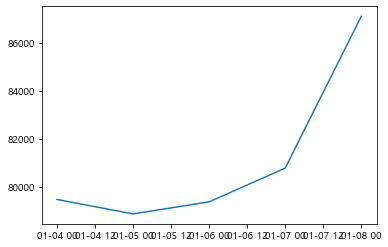

In [32]:
plt.plot(df['종가'].head())

In [33]:
df.head(10)

,종가,일계도,이계도
날짜,,,
2021-01-04,79483,0,0
2021-01-05,78881,-602,-602
2021-01-06,79383,502,1104
2021-01-07,80788,1405,903
2021-01-08,87111,6323,4918
2021-01-11,90924,3813,-2510
2021-01-12,91827,903,-2910
2021-01-13,91225,-602,-1505
2021-01-14,90623,-602,0


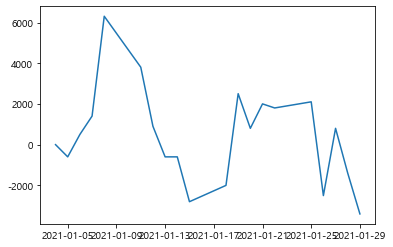

In [34]:
plt.plot(df['일계도'][:20])

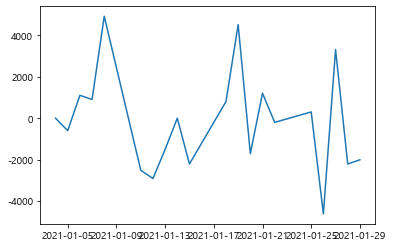

In [35]:
plt.plot(df['이계도'][:20])

In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM

In [45]:
help(Model)

Help on class Model in module tensorflow.python.keras.engine.training:

class Model(tensorflow.python.keras.engine.base_layer.Layer, tensorflow.python.keras.utils.version_utils.ModelVersionSelector)
 |  Model(*args, **kwargs)
 |  
 |  `Model` groups layers into an object with training and inference features.
 |  
 |  Args:
 |      inputs: The input(s) of the model: a `keras.Input` object or list of
 |          `keras.Input` objects.
 |      outputs: The output(s) of the model. See Functional API example below.
 |      name: String, the name of the model.
 |  
 |  There are two ways to instantiate a `Model`:
 |  
 |  1 - With the "Functional API", where you start from `Input`,
 |  you chain layer calls to specify the model's forward pass,
 |  and finally you create your model from inputs and outputs:
 |  
 |  ```python
 |  import tensorflow as tf
 |  
 |  inputs = tf.keras.Input(shape=(3,))
 |  x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
 |  outputs = tf.keras.layers.Den